# Titanic Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [3]:
# checking the shape of the dataset
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking the null values in the dataset

In [5]:
100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False)


,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


In [6]:
# dropping cabin from dataset because it contains 77% of null values it will the help in analysis
df.drop("Cabin", axis = 1, inplace = True)

In [7]:
# dropping some colum which doesn't add much value in analysis
df.drop(["PassengerId","Ticket","Name"], axis = 1, inplace = True)

In [8]:
df = df[~pd.isnull(df['Embarked'])]


In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


<ipython-input-9-7ee7fe972bc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [10]:
100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False)


,0
Survived,0.0
Pclass,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Fare,0.0
Embarked,0.0


In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
for i in df.columns:
  print(df[i].value_counts())
  print("="*100)

Survived
0    549
1    340
Name: count, dtype: int64
Pclass
3    491
1    214
2    184
Name: count, dtype: int64
Sex
male      577
female    312
Name: count, dtype: int64
Age
29.642093    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64
SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 247, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [13]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [14]:
df['Survived'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})


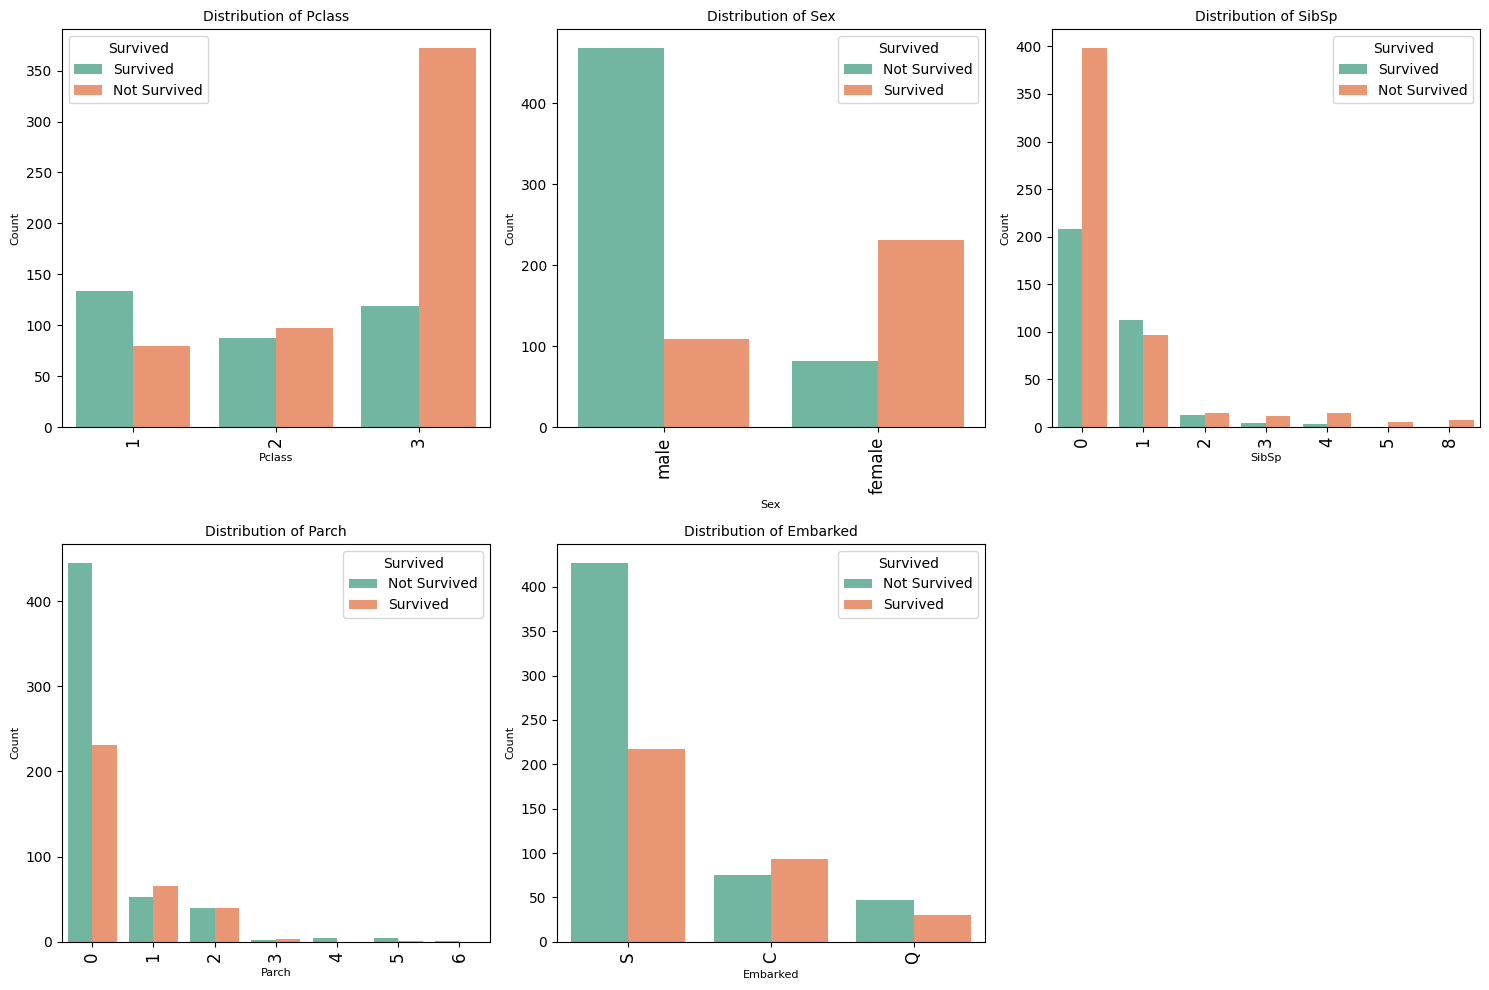

In [15]:

cat_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']



# Set the number of rows and columns for the subplot grid
rows = 2 # Increased to fit all 9 plots
cols = 3

# Create a figure and axis object with the desired grid size
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjusted figsize

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column and plot it in the respective subplot
for i, col in enumerate(cat_columns):
    # Create the count plot on the current axis
    sns.countplot(data=df, x=col,hue ="Survived", palette='Set2', ax=axes[i])

    # Set the title and labels for each subplot
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)

    # Rotate x-axis labels and set their font size
    axes[i].tick_params(axis='x', labelsize=12, rotation=90)

# Hide any unused subplots (if any)
for j in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

# 0 means not converted
# 1 means converted


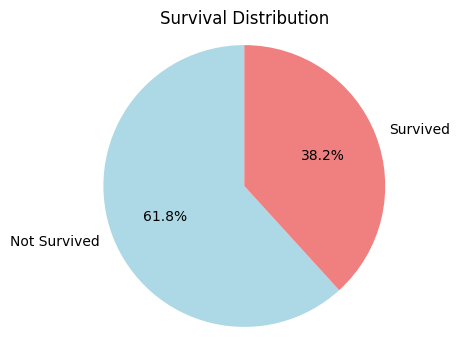

In [16]:

# Count the values for Survived and Not Survived
survived_counts = df['Survived'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Set title
plt.title('Survival Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


In [17]:
df['Survived'] = df['Survived'].map({'Not Survived': 0, 'Survived': 1})


In [18]:
df.Survived.value_counts(normalize= True)

,proportion
Survived,
0,0.617548
1,0.382452


In [19]:
num_col = []
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':  # Check if column is numeric (int or float)
        num_col.append(i)

print(num_col)


['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [20]:
df[num_col].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.074513,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.328256,0.081656,0.016824,-0.548193
Age,-0.074513,-0.328256,1.000000,-0.231908,-0.178013,0.088780
SibSp,-0.034040,0.081656,-0.231908,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.178013,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.088780,0.160887,0.217532,1.000000


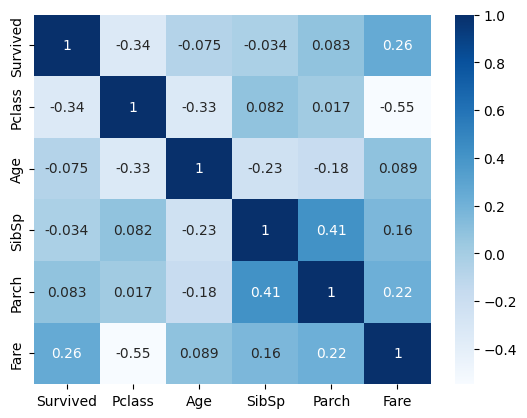

In [21]:
sns.heatmap(df[num_col].corr(), annot=True, cmap="Blues")
plt.show()


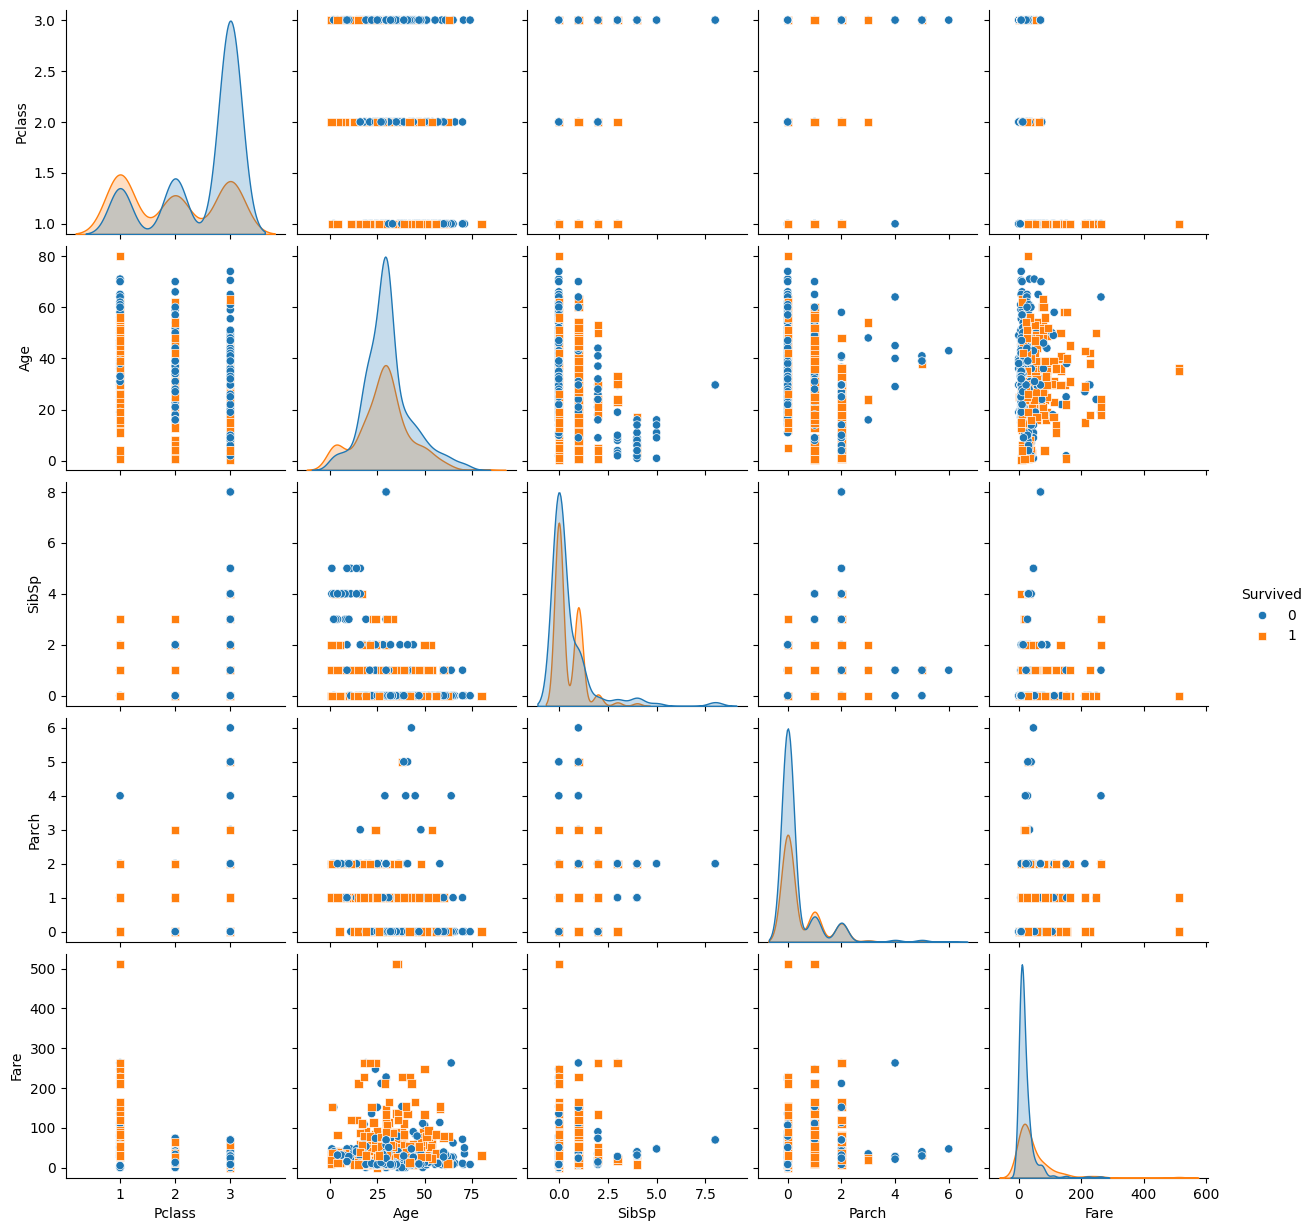

In [22]:
sns.pairplot(df, hue='Survived', diag_kind='kde', markers=["o", "s"])  # "o" for survived, "s" for not survived


# Data Modelling

## Creating Dummy Variables

In [23]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [24]:
df['SibSp'] = df['SibSp'].astype('category')
df['Parch'] = df['Parch'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [25]:
dummy_col = pd.get_dummies(df[["Pclass","Sex","SibSp","Parch","Embarked"]], drop_first=True, dtype=int)


In [26]:
dummy_col.head()

,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
df = pd.concat([df,dummy_col], axis = 1)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,...,0,0,0,0,0,0,0,0,0,1


In [29]:
df.drop(["Pclass","Sex","SibSp","Parch","Embarked"], axis = 1, inplace = True)

## Divide the datasets into target variables and independent variables

In [30]:
# Divide the datasets into target variables and independent variables
X = df.drop("Survived", axis = 1)
y = df["Survived"]

## Splitting the dataset into train and test

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((622, 19), (267, 19), (622,), (267,))

## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [35]:

X_train[["Age","Fare"]] = scaler.fit_transform(X_train[["Age","Fare"]])

In [36]:
X_train.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
486,0.389755,1.124776,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
293,-0.440006,-0.468406,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
173,-0.666304,-0.486566,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
450,0.465188,-0.097351,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
361,-0.062842,-0.097924,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
X_train.corr()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
Age,1.000000,0.093203,-0.025187,-0.281222,0.044610,0.031724,-0.104552,-0.128786,-0.254799,-0.119906,-0.001297,-0.140609,-0.257681,0.022863,0.084899,0.051640,0.039856,-0.032432,-0.010242
Fare,0.093203,1.000000,-0.106229,-0.418121,-0.170156,0.125291,0.078244,0.142212,-0.000078,0.019396,0.065111,0.110530,0.217683,-0.011942,0.097427,0.001873,0.011180,-0.129787,-0.145436
Pclass_2,-0.025187,-0.106229,1.000000,-0.568014,-0.101732,0.130095,0.038668,-0.041611,-0.070692,-0.035088,-0.045372,0.090232,0.011458,0.044220,-0.035088,-0.035088,-0.020225,-0.141199,0.167002
Pclass_3,-0.281222,-0.418121,-0.568014,1.000000,0.147652,-0.200030,0.004497,0.030281,0.124455,0.061773,0.079878,-0.060798,-0.017212,0.007346,0.015030,0.061773,0.035607,0.262094,-0.016886
Sex_male,0.044610,-0.170156,-0.101732,0.147652,1.000000,-0.164228,-0.053380,-0.096416,0.026879,0.050060,-0.011236,-0.094659,-0.155676,-0.087205,-0.047856,-0.047856,-0.055806,-0.079445,0.111806
SibSp_1,0.031724,0.125291,0.130095,-0.200030,-0.164228,1.000000,-0.106766,-0.080110,-0.080110,-0.039763,-0.051416,0.233774,0.015694,0.073999,0.068004,0.068004,0.070258,-0.070043,-0.024560
SibSp_2,-0.104552,0.078244,0.038668,0.004497,-0.053380,-0.106766,1.000000,-0.026218,-0.026218,-0.013013,-0.016827,0.059913,0.059526,0.082854,-0.013013,-0.013013,-0.007501,-0.026023,-0.004519
SibSp_3,-0.128786,0.142212,-0.041611,0.030281,-0.096416,-0.080110,-0.026218,1.000000,-0.019672,-0.009764,-0.012626,0.119374,0.191715,-0.012626,-0.009764,-0.009764,-0.005628,-0.043246,0.086365
SibSp_4,-0.254799,-0.000078,-0.070692,0.124455,0.026879,-0.080110,-0.026218,-0.019672,1.000000,-0.009764,-0.012626,0.188833,0.152124,-0.012626,-0.009764,-0.009764,-0.005628,0.122798,-0.018350
SibSp_5,-0.119906,0.019396,-0.035088,0.061773,0.050060,-0.039763,-0.013013,-0.009764,-0.009764,1.000000,-0.006267,-0.026938,0.213063,-0.006267,-0.004847,-0.004847,-0.002794,-0.021465,0.042867


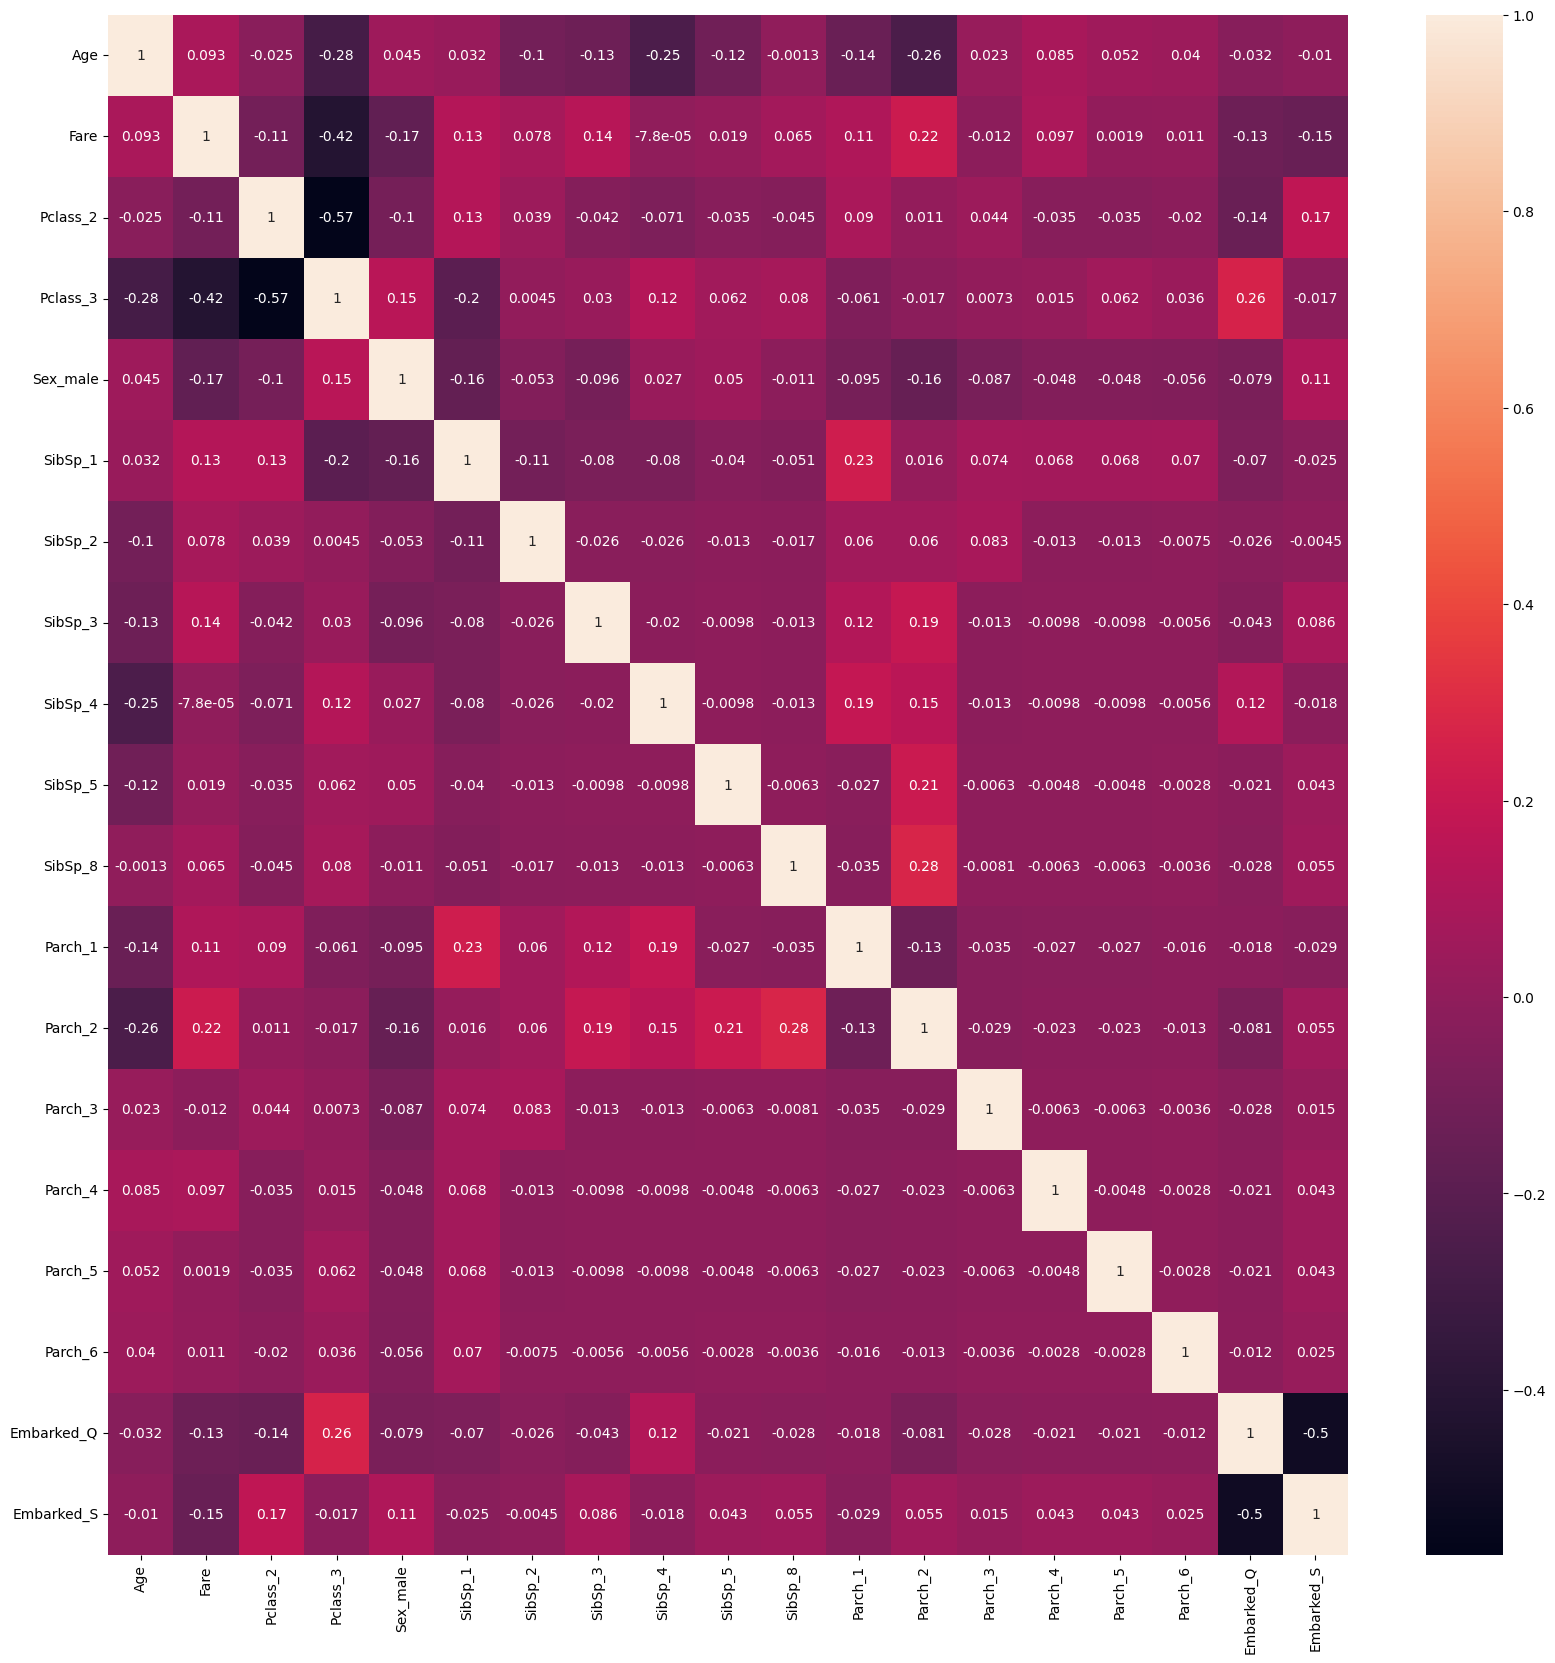

In [38]:
plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

# Logistic Regression

In [39]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression()
logisticreg.fit(X_train, y_train)

LogisticRegression()

## Using Rfe

In [40]:
# Import RFE and select 18 variables
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logisticreg, n_features_to_select=18) # n_features_to_select is the number of features you want to select
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('Fare', True, 1),
 ('Pclass_2', True, 1),
 ('Pclass_3', True, 1),
 ('Sex_male', True, 1),
 ('SibSp_1', True, 1),
 ('SibSp_2', True, 1),
 ('SibSp_3', True, 1),
 ('SibSp_4', True, 1),
 ('SibSp_5', True, 1),
 ('SibSp_8', True, 1),
 ('Parch_1', True, 1),
 ('Parch_2', False, 2),
 ('Parch_3', True, 1),
 ('Parch_4', True, 1),
 ('Parch_5', True, 1),
 ('Parch_6', True, 1),
 ('Embarked_Q', True, 1),
 ('Embarked_S', True, 1)]

In [42]:
# Put all the columns selected by RFE in the variable "selected_col"

selected_col = X_train.columns[rfe.support_]
selected_col

Index(['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_1', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [43]:
# Import statsmodels

import statsmodels.api as sm

# Model 1

In [44]:
# Logistic regression model with all the variables

X_train_sm = sm.add_constant(X_train[selected_col])
logreg1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      603
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -262.37
Date:                Wed, 25 Sep 2024   Deviance:                       524.75
Time:                        12:15:10   Pearson chi2:                     593.
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3874
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8572      0.416      6.860      0.000       2.041       3.673
Age           -0.5672      0.134     -4.235      0.000      -0.830      -0.305
Fare           0.1629      0.168      0.967      0.334      -0.167       0.493
Pclass_2      -0.8886      0.377     -2.354      0.019      -1.628      -0.149
Pclass_3      -1.8948      0.381     -4.979      0.000      -2.641      -1.149
Sex_male      -2.7706      0.249    -11.142      0.000      -3.258      -2.283
SibSp_1        0.1066      0.267      0.399      0.690      -0.417       0.631
SibSp_2       -0.7819      0.651     -1.200      0.230      -2.059       0.495
SibSp_3       -2.7749      0.853     -3.254      0.001      -4.446      -1.104
SibSp_4       -2.7102      1.127     -2.404      0.016      -4.920      -0.501
SibSp_5      -22.3241   4.57e+04     -0.000      1.000   -8.96e+04    8.96e+04
SibSp_8      -22.9939   2.96e+04     -0.001      0.999    -5.8e+04    5.79e+04
Parch_1        0.7129      0.344      2.073      0.038       0.039       1.387
Parch_3        0.2619      1.050      0.250      0.803      -1.795       2.319
Parch_4      -23.4463   4.36e+04     -0.001      1.000   -8.55e+04    8.54e+04
Parch_5      -23.0221   3.95e+04     -0.001      1.000   -7.75e+04    7.74e+04
Parch_6      -23.6504   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Embarked_Q    -0.2332      0.474     -0.492      0.623      -1.162       0.696
Embarked_S    -0.4667      0.293     -1.591      0.112      -1.042       0.108
==============================================================================
"""

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
X_train_new = X_train[selected_col]
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Pclass_3,4.57
17,Embarked_S,4.15
4,Sex_male,2.78
2,Pclass_2,2.08
16,Embarked_Q,1.54
5,SibSp_1,1.50
1,Fare,1.39
11,Parch_1,1.35
0,Age,1.30
8,SibSp_4,1.19


In [46]:
selected_col = selected_col.drop("SibSp_5")

# Model 2

In [47]:
# Logistic regression model with all the variables

X_train_sm = sm.add_constant(X_train[selected_col])
logreg2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      604
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -263.12
Date:                Wed, 25 Sep 2024   Deviance:                       526.23
Time:                        12:15:10   Pearson chi2:                     599.
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3860
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8721      0.416      6.898      0.000       2.056       3.688
Age           -0.5528      0.133     -4.167      0.000      -0.813      -0.293
Fare           0.1495      0.166      0.902      0.367      -0.175       0.474
Pclass_2      -0.8924      0.377     -2.367      0.018      -1.631      -0.153
Pclass_3      -1.9159      0.380     -5.048      0.000      -2.660      -1.172
Sex_male      -2.7822      0.249    -11.188      0.000      -3.270      -2.295
SibSp_1        0.1172      0.267      0.438      0.661      -0.407       0.641
SibSp_2       -0.7574      0.651     -1.164      0.244      -2.032       0.518
SibSp_3       -2.7344      0.848     -3.224      0.001      -4.397      -1.072
SibSp_4       -2.6668      1.126     -2.368      0.018      -4.874      -0.460
SibSp_8      -21.9605   1.79e+04     -0.001      0.999   -3.51e+04    3.51e+04
Parch_1        0.7231      0.344      2.103      0.035       0.049       1.397
Parch_3        0.2561      1.053      0.243      0.808      -1.808       2.320
Parch_4      -22.4354   2.64e+04     -0.001      0.999   -5.18e+04    5.18e+04
Parch_5      -22.0161    2.4e+04     -0.001      0.999    -4.7e+04    4.69e+04
Parch_6      -22.6507   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Embarked_Q    -0.2319      0.475     -0.489      0.625      -1.162       0.698
Embarked_S    -0.4814      0.293     -1.643      0.100      -1.056       0.093
==============================================================================
"""

In [48]:
selected_col = selected_col.drop("SibSp_8")

# Model 3

In [49]:
# Logistic regression model with all the variables

X_train_sm = sm.add_constant(X_train[selected_col])
logreg3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      605
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -265.38
Date:                Wed, 25 Sep 2024   Deviance:                       530.77
Time:                        12:15:10   Pearson chi2:                     613.
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3815
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8960      0.414      6.999      0.000       2.085       3.707
Age           -0.5636      0.132     -4.255      0.000      -0.823      -0.304
Fare           0.1006      0.155      0.647      0.518      -0.204       0.405
Pclass_2      -0.9385      0.373     -2.517      0.012      -1.669      -0.208
Pclass_3      -2.0192      0.373     -5.420      0.000      -2.749      -1.289
Sex_male      -2.7474      0.246    -11.170      0.000      -3.229      -2.265
SibSp_1        0.1488      0.265      0.560      0.575      -0.371       0.669
SibSp_2       -0.7064      0.648     -1.089      0.276      -1.977       0.564
SibSp_3       -2.6143      0.834     -3.133      0.002      -4.250      -0.979
SibSp_4       -2.6087      1.122     -2.325      0.020      -4.808      -0.409
Parch_1        0.7356      0.342      2.151      0.031       0.065       1.406
Parch_3        0.3023      1.054      0.287      0.774      -1.764       2.369
Parch_4      -22.3211   2.63e+04     -0.001      0.999   -5.17e+04    5.16e+04
Parch_5      -21.9169    2.4e+04     -0.001      0.999   -4.71e+04     4.7e+04
Parch_6      -22.5462   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Embarked_Q    -0.1966      0.473     -0.416      0.677      -1.123       0.730
Embarked_S    -0.5137      0.292     -1.759      0.079      -1.086       0.059
==============================================================================
"""

In [50]:
selected_col = selected_col.drop("Parch_4")

# Model 4

In [51]:
# Logistic regression model with all the variables

X_train_sm = sm.add_constant(X_train[selected_col])
logreg4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      606
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -267.10
Date:                Wed, 25 Sep 2024   Deviance:                       534.21
Time:                        12:15:11   Pearson chi2:                     624.
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3780
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9219      0.410      7.120      0.000       2.118       3.726
Age           -0.5849      0.131     -4.456      0.000      -0.842      -0.328
Fare           0.0747      0.148      0.506      0.613      -0.215       0.364
Pclass_2      -0.9622      0.370     -2.599      0.009      -1.688      -0.237
Pclass_3      -2.0879      0.368     -5.674      0.000      -2.809      -1.367
Sex_male      -2.7235      0.244    -11.163      0.000      -3.202      -2.245
SibSp_1        0.1271      0.263      0.483      0.629      -0.389       0.643
SibSp_2       -0.6995      0.649     -1.078      0.281      -1.972       0.573
SibSp_3       -2.5694      0.829     -3.101      0.002      -4.193      -0.945
SibSp_4       -2.6080      1.119     -2.330      0.020      -4.802      -0.414
Parch_1        0.7575      0.341      2.223      0.026       0.090       1.425
Parch_3        0.3635      1.056      0.344      0.731      -1.707       2.434
Parch_5      -20.8213   1.46e+04     -0.001      0.999   -2.86e+04    2.85e+04
Parch_6      -21.4277   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Embarked_Q    -0.1742      0.471     -0.370      0.711      -1.097       0.748
Embarked_S    -0.5394      0.291     -1.853      0.064      -1.110       0.031
==============================================================================
"""

In [52]:
selected_col = selected_col.drop("Parch_5")

# Model 5

In [53]:
# Logistic regression model with all the variables

X_train_sm = sm.add_constant(X_train[selected_col])
logreg5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      607
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -268.43
Date:                Wed, 25 Sep 2024   Deviance:                       536.87
Time:                        12:15:11   Pearson chi2:                     633.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3754
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9366      0.410      7.158      0.000       2.133       3.741
Age           -0.6018      0.131     -4.591      0.000      -0.859      -0.345
Fare           0.0642      0.147      0.438      0.661      -0.223       0.352
Pclass_2      -0.9790      0.369     -2.650      0.008      -1.703      -0.255
Pclass_3      -2.1430      0.366     -5.851      0.000      -2.861      -1.425
Sex_male      -2.7007      0.243    -11.127      0.000      -3.176      -2.225
SibSp_1        0.1077      0.261      0.412      0.680      -0.405       0.620
SibSp_2       -0.6973      0.650     -1.073      0.283      -1.971       0.576
SibSp_3       -2.5469      0.827     -3.080      0.002      -4.168      -0.926
SibSp_4       -2.6099      1.117     -2.336      0.019      -4.800      -0.420
Parch_1        0.7738      0.340      2.275      0.023       0.107       1.440
Parch_3        0.4157      1.057      0.393      0.694      -1.657       2.488
Parch_6      -20.3334   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Embarked_Q    -0.1465      0.469     -0.312      0.755      -1.067       0.774
Embarked_S    -0.5542      0.291     -1.904      0.057      -1.125       0.016
==============================================================================
"""

In [54]:
selected_col = selected_col.drop("Parch_6")

# Model 6

In [55]:
# Logistic regression model with all the variables

X_train_sm = sm.add_constant(X_train[selected_col])
logreg6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      608
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.01
Date:                Wed, 25 Sep 2024   Deviance:                       538.01
Time:                        12:15:11   Pearson chi2:                     636.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3742
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9499      0.410      7.189      0.000       2.146       3.754
Age           -0.6108      0.131     -4.666      0.000      -0.867      -0.354
Fare           0.0582      0.146      0.399      0.690      -0.228       0.345
Pclass_2      -0.9890      0.369     -2.681      0.007      -1.712      -0.266
Pclass_3      -2.1710      0.365     -5.946      0.000      -2.887      -1.455
Sex_male      -2.6917      0.242    -11.103      0.000      -3.167      -2.217
SibSp_1        0.0870      0.260      0.334      0.738      -0.423       0.597
SibSp_2       -0.7018      0.650     -1.079      0.281      -1.977       0.573
SibSp_3       -2.5423      0.826     -3.076      0.002      -4.162      -0.923
SibSp_4       -2.6174      1.116     -2.344      0.019      -4.806      -0.429
Parch_1        0.7853      0.340      2.311      0.021       0.119       1.451
Parch_3        0.4454      1.059      0.421      0.674      -1.630       2.521
Embarked_Q    -0.1356      0.469     -0.289      0.773      -1.055       0.784
Embarked_S    -0.5611      0.291     -1.928      0.054      -1.131       0.009
==============================================================================
"""

In [56]:
selected_col = selected_col.drop("Embarked_Q")

# Model 7

In [57]:
# Logistic regression model with all the variables

X_train_sm = sm.add_constant(X_train[selected_col])
logreg7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      609
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.05
Date:                Wed, 25 Sep 2024   Deviance:                       538.09
Time:                        12:15:11   Pearson chi2:                     638.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3741
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9101      0.385      7.553      0.000       2.155       3.665
Age           -0.6133      0.131     -4.695      0.000      -0.869      -0.357
Fare           0.0616      0.145      0.424      0.672      -0.223       0.347
Pclass_2      -0.9969      0.368     -2.712      0.007      -1.717      -0.276
Pclass_3      -2.1923      0.358     -6.131      0.000      -2.893      -1.492
Sex_male      -2.6817      0.240    -11.197      0.000      -3.151      -2.212
SibSp_1        0.0904      0.260      0.348      0.728      -0.419       0.600
SibSp_2       -0.7042      0.650     -1.084      0.278      -1.977       0.569
SibSp_3       -2.5442      0.827     -3.075      0.002      -4.166      -0.922
SibSp_4       -2.6367      1.112     -2.370      0.018      -4.817      -0.456
Parch_1        0.7912      0.339      2.334      0.020       0.127       1.456
Parch_3        0.4621      1.055      0.438      0.661      -1.605       2.530
Embarked_S    -0.5169      0.248     -2.086      0.037      -1.002      -0.031
==============================================================================
"""

In [58]:
selected_col = selected_col.drop("SibSp_1")

# Model 8

In [59]:
# Logistic regression model with all the variables

X_train_sm = sm.add_constant(X_train[selected_col])
logreg8 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      610
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.11
Date:                Wed, 25 Sep 2024   Deviance:                       538.21
Time:                        12:15:11   Pearson chi2:                     636.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3740
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9385      0.377      7.790      0.000       2.199       3.678
Age           -0.6130      0.131     -4.696      0.000      -0.869      -0.357
Fare           0.0665      0.146      0.454      0.650      -0.220       0.354
Pclass_2      -0.9935      0.368     -2.702      0.007      -1.714      -0.273
Pclass_3      -2.1959      0.358     -6.136      0.000      -2.897      -1.494
Sex_male      -2.6902      0.239    -11.279      0.000      -3.158      -2.223
SibSp_2       -0.7417      0.642     -1.155      0.248      -2.001       0.517
SibSp_3       -2.5918      0.818     -3.170      0.002      -4.194      -0.989
SibSp_4       -2.6715      1.108     -2.412      0.016      -4.842      -0.501
Parch_1        0.8241      0.327      2.523      0.012       0.184       1.464
Parch_3        0.5028      1.055      0.477      0.634      -1.564       2.570
Embarked_S    -0.5162      0.248     -2.083      0.037      -1.002      -0.030
==============================================================================
"""

In [60]:
selected_col = selected_col.drop("Parch_3")

# Model 9

In [61]:
# Logistic regression model with all the variables

X_train_sm = sm.add_constant(X_train[selected_col])
logreg9 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      611
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.22
Date:                Wed, 25 Sep 2024   Deviance:                       538.45
Time:                        12:15:11   Pearson chi2:                     634.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3738
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9397      0.377      7.794      0.000       2.200       3.679
Age           -0.6080      0.130     -4.677      0.000      -0.863      -0.353
Fare           0.0684      0.147      0.466      0.641      -0.219       0.356
Pclass_2      -0.9809      0.367     -2.675      0.007      -1.699      -0.262
Pclass_3      -2.1851      0.357     -6.120      0.000      -2.885      -1.485
Sex_male      -2.6986      0.238    -11.338      0.000      -3.165      -2.232
SibSp_2       -0.7131      0.634     -1.124      0.261      -1.956       0.530
SibSp_3       -2.5969      0.818     -3.176      0.001      -4.199      -0.994
SibSp_4       -2.6695      1.108     -2.409      0.016      -4.841      -0.498
Parch_1        0.8176      0.326      2.504      0.012       0.178       1.457
Embarked_S    -0.5140      0.248     -2.075      0.038      -1.000      -0.028
==============================================================================
"""

In [62]:
selected_col = selected_col.drop("Fare")

# Model 10

In [63]:
# Logistic regression model with all the variables

X_train_sm = sm.add_constant(X_train[selected_col])
logreg10 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      612
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.34
Date:                Wed, 25 Sep 2024   Deviance:                       538.67
Time:                        12:15:11   Pearson chi2:                     639.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3735
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0162      0.341      8.834      0.000       2.347       3.685
Age           -0.6141      0.129     -4.746      0.000      -0.868      -0.361
Pclass_2      -1.0588      0.327     -3.237      0.001      -1.700      -0.418
Pclass_3      -2.2786      0.297     -7.668      0.000      -2.861      -1.696
Sex_male      -2.7107      0.237    -11.441      0.000      -3.175      -2.246
SibSp_2       -0.6905      0.633     -1.090      0.276      -1.932       0.551
SibSp_3       -2.5196      0.792     -3.182      0.001      -4.072      -0.967
SibSp_4       -2.6570      1.107     -2.399      0.016      -4.827      -0.486
Parch_1        0.8345      0.324      2.576      0.010       0.200       1.469
Embarked_S    -0.5265      0.246     -2.138      0.033      -1.009      -0.044
==============================================================================
"""

In [64]:
selected_col = selected_col.drop("SibSp_2")

# Final model

In [65]:
# Logistic regression model with all the variables

X_train_sm = sm.add_constant(X_train[selected_col])
logreg11 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      613
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.94
Date:                Wed, 25 Sep 2024   Deviance:                       539.88
Time:                        12:15:11   Pearson chi2:                     640.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3723
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9905      0.340      8.793      0.000       2.324       3.657
Age           -0.5972      0.128     -4.667      0.000      -0.848      -0.346
Pclass_2      -1.0696      0.326     -3.277      0.001      -1.709      -0.430
Pclass_3      -2.2743      0.296     -7.671      0.000      -2.855      -1.693
Sex_male      -2.6927      0.236    -11.432      0.000      -3.154      -2.231
SibSp_3       -2.4640      0.790     -3.121      0.002      -4.011      -0.916
SibSp_4       -2.5997      1.106     -2.350      0.019      -4.768      -0.432
Parch_1        0.8133      0.323      2.517      0.012       0.180       1.447
Embarked_S    -0.5340      0.246     -2.172      0.030      -1.016      -0.052
==============================================================================
"""

# Now our model is stable variables which have p value greater then 0.05 is removed

# Model evaluation

In [66]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
486,0.902353
293,0.609431
173,0.107876
450,0.170266
361,0.324242
332,0.552089
800,0.183376
91,0.112288
834,0.121588
182,0.015191


In [67]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9023528 , 0.60943075, 0.10787555, 0.17026614, 0.32424181,
       0.5520891 , 0.18337575, 0.11228832, 0.12158809, 0.0151914 ])

In [68]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survived_Prob':y_train_pred})
y_train_pred_final.head()

,Survived,Survived_Prob
0,1,0.902353
1,0,0.609431
2,0,0.107876
3,0,0.170266
4,0,0.324242


In [69]:
y_train_pred_final['Predicted'] = y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survived_Prob,Predicted
0,1,0.902353,1
1,0,0.609431,1
2,0,0.107876,0
3,0,0.170266,0
4,0,0.324242,0


In [70]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Predicted )
print(confusion)

[[331  51]
 [ 65 175]]


In [71]:
# Checking the matrix accuracy

print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Predicted))

0.8135048231511254


In [72]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.902353,1,1,1,1,1,1,1,1,1,1,1
1,0,0.609431,1,1,1,1,1,1,1,1,0,0,0
2,0,0.107876,0,1,1,0,0,0,0,0,0,0,0
3,0,0.170266,0,1,1,0,0,0,0,0,0,0,0
4,0,0.324242,0,1,1,1,1,0,0,0,0,0,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385852  1.000000  0.000000
0.1   0.1  0.567524  0.925000  0.342932
0.2   0.2  0.726688  0.870833  0.636126
0.3   0.3  0.771704  0.816667  0.743455
0.4   0.4  0.786174  0.750000  0.808901
0.5   0.5  0.813505  0.729167  0.866492
0.6   0.6  0.831190  0.687500  0.921466
0.7   0.7  0.790997  0.504167  0.971204
0.8   0.8  0.760450  0.395833  0.989529
0.9   0.9  0.713826  0.258333  1.000000


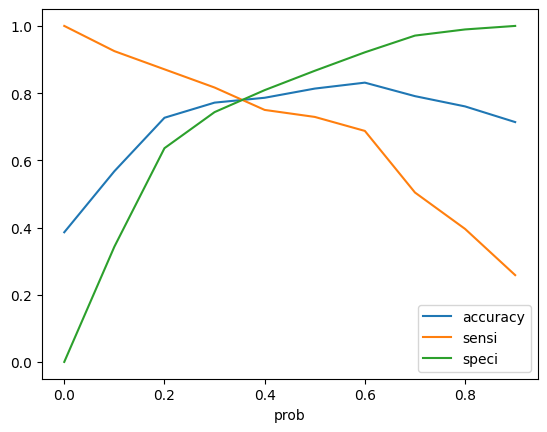

In [74]:
# plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The graph indicates that the optimal cut-off point is at 0.35.











# Checking Test Accuracy

In [75]:
X_test[["Age","Fare"]] = scaler.transform(X_test[["Age","Fare"]])

In [76]:
X_test = X_test[selected_col]
X_test.head()

,Age,Pclass_2,Pclass_3,Sex_male,SibSp_3,SibSp_4,Parch_1,Embarked_S
281,-0.138274,0,1,1,0,0,0,1
435,-1.194334,0,0,0,0,0,0,1
39,-1.194334,0,1,0,0,0,0,0
418,0.012591,1,0,1,0,0,0,1
585,-0.892603,0,0,0,0,0,0,1


In [77]:
X_test_sm = sm.add_constant(X_test)

In [78]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)

In [79]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [80]:
# Let's see the head
y_pred_1.head()

,0
281,0.081064
435,0.959678
39,0.806818
418,0.211912
585,0.952097


In [81]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [82]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [83]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [84]:
y_pred_final.head()

,Survived,0
0,0,0.081064
1,1,0.959678
2,1,0.806818
3,0,0.211912
4,1,0.952097


In [85]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survived_Prob_test'})

In [86]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Survived,Survived_Prob_test
0,0,0.081064
1,1,0.959678
2,1,0.806818
3,0,0.211912
4,1,0.952097


In [87]:
y_pred_final['final_predicted'] = y_pred_final.Survived_Prob_test.map(lambda x: 1 if x > 0.35 else 0)

In [88]:
metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted)

0.7902621722846442